In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
loan = pd.read_csv('loan.csv')

In [3]:
loan.head()

,Income,Loan Amount,Default
0,15,8,No
1,30,8,No
2,5,9,Yes
3,22,10,No
4,33,12,No


In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Income       30 non-null     int64 
 1   Loan Amount  30 non-null     int64 
 2   Default      30 non-null     object
dtypes: int64(2), object(1)
memory usage: 852.0+ bytes


In [3]:
loan.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,30.0,18.766667,8.572946,5.0,13.00,18.0,25.5,34.0
Loan Amount,30.0,51.966667,34.055212,8.0,21.25,49.0,79.5,110.0


<Axes: xlabel='Default', ylabel='Income'>

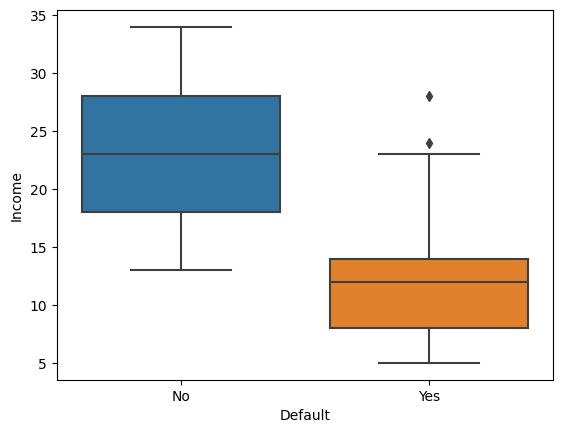

In [6]:
sns.boxplot(data=loan, x='Default', y='Income')

<Axes: xlabel='Default', ylabel='Loan Amount'>

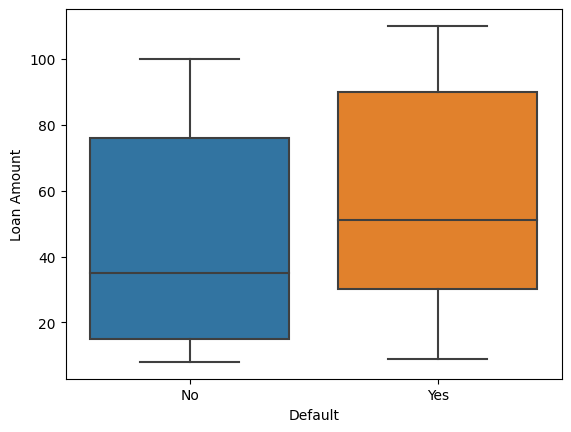

In [7]:
sns.boxplot(data=loan, x='Default', y='Loan Amount')

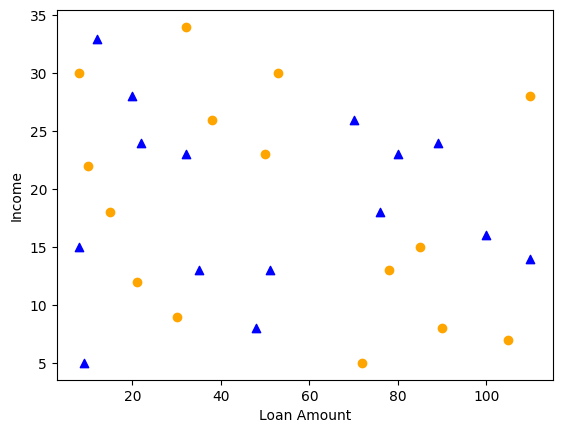

In [22]:
for i in range(len(loan)):
    plt.scatter(loan['Loan Amount'][i], loan['Income'][i], marker= "^" if i % 2 == 0 else "o", c="b" if i % 2 == 0 else "#FFA500")
plt.ylabel('Income')
plt.xlabel('Loan Amount')
plt.show()

In [4]:
x = loan.drop(columns='Default')

In [24]:
x.head()

,Income,Loan Amount
0,15,8
1,30,8
2,5,9
3,22,10
4,33,12


In [5]:
y = loan['Default']

In [26]:
y.head()

0     No
1     No
2    Yes
3     No
4     No
Name: Default, dtype: object

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
# print(x_train.shape, x_test.shape)
x_train.shape, x_test.shape

((24, 2), (6, 2))

In [12]:
dt = DecisionTreeClassifier(random_state=42)

In [13]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [14]:
dt.score(x_train, y_train)

1.0

In [15]:
dt.score(x_test, y_test)

0.8333333333333334

In [38]:
y_pred_train = dt.predict(x_train)

In [16]:
y_pred = dt.predict(x_test)

In [39]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

          No       1.00      0.40      0.57         5
         Yes       0.25      1.00      0.40         1

    accuracy                           0.50         6
   macro avg       0.62      0.70      0.49         6
weighted avg       0.88      0.50      0.54         6



In [45]:
accuracy_score(y_pred, y_test)

0.5

In [17]:
parameters = {
              'max_depth': [2, 3, 4, 5],
              'min_samples_split': [2, 3, 4],
              'min_samples_leaf': [1, 2, 3, 4, 5, 6]
              }

In [18]:
# gs = GridSearchCV(dt, parameters, cv=5)
classifier = DecisionTreeClassifier()
gs = GridSearchCV(estimator=classifier, param_grid=parameters)

In [19]:
gs.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4]})

In [20]:
gs.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=3)

In [ ]:
model = gs.best_estimator_

In [21]:
print(gs.best_params_)

{'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 2}


In [22]:
print(gs.best_score_)

0.7500000000000001
